In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
data = pd.read_csv('D:\\Data-science\\Titanic_train.csv')
#data.head()

In [34]:
#data.info()

In [35]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Name', axis=1,inplace=True)

In [37]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [38]:
data['Cabin'].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [39]:
data.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [40]:
long_df = data['Cabin'].str.split(' ', expand=True)
split_cabin_long = pd.concat([data[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].loc[data.index.repeat(2)].reset_index(drop=True), long_df.stack().reset_index(drop=True)], axis=1)
split_cabin_long.columns = ['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','cabin_split']


In [41]:
split_cabin_long.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1782.000000,1782.000000,1428.000000,1782.000000,1782.000000,1782.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486456,0.835836,14.521407,1.102434,0.805831,49.679476
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.903100
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
split_cabin_long.drop('Ticket', axis=1, inplace=True)

### Data visulation Histogram

Text(0.5, 1.0, 'Histogram of Parch Data')

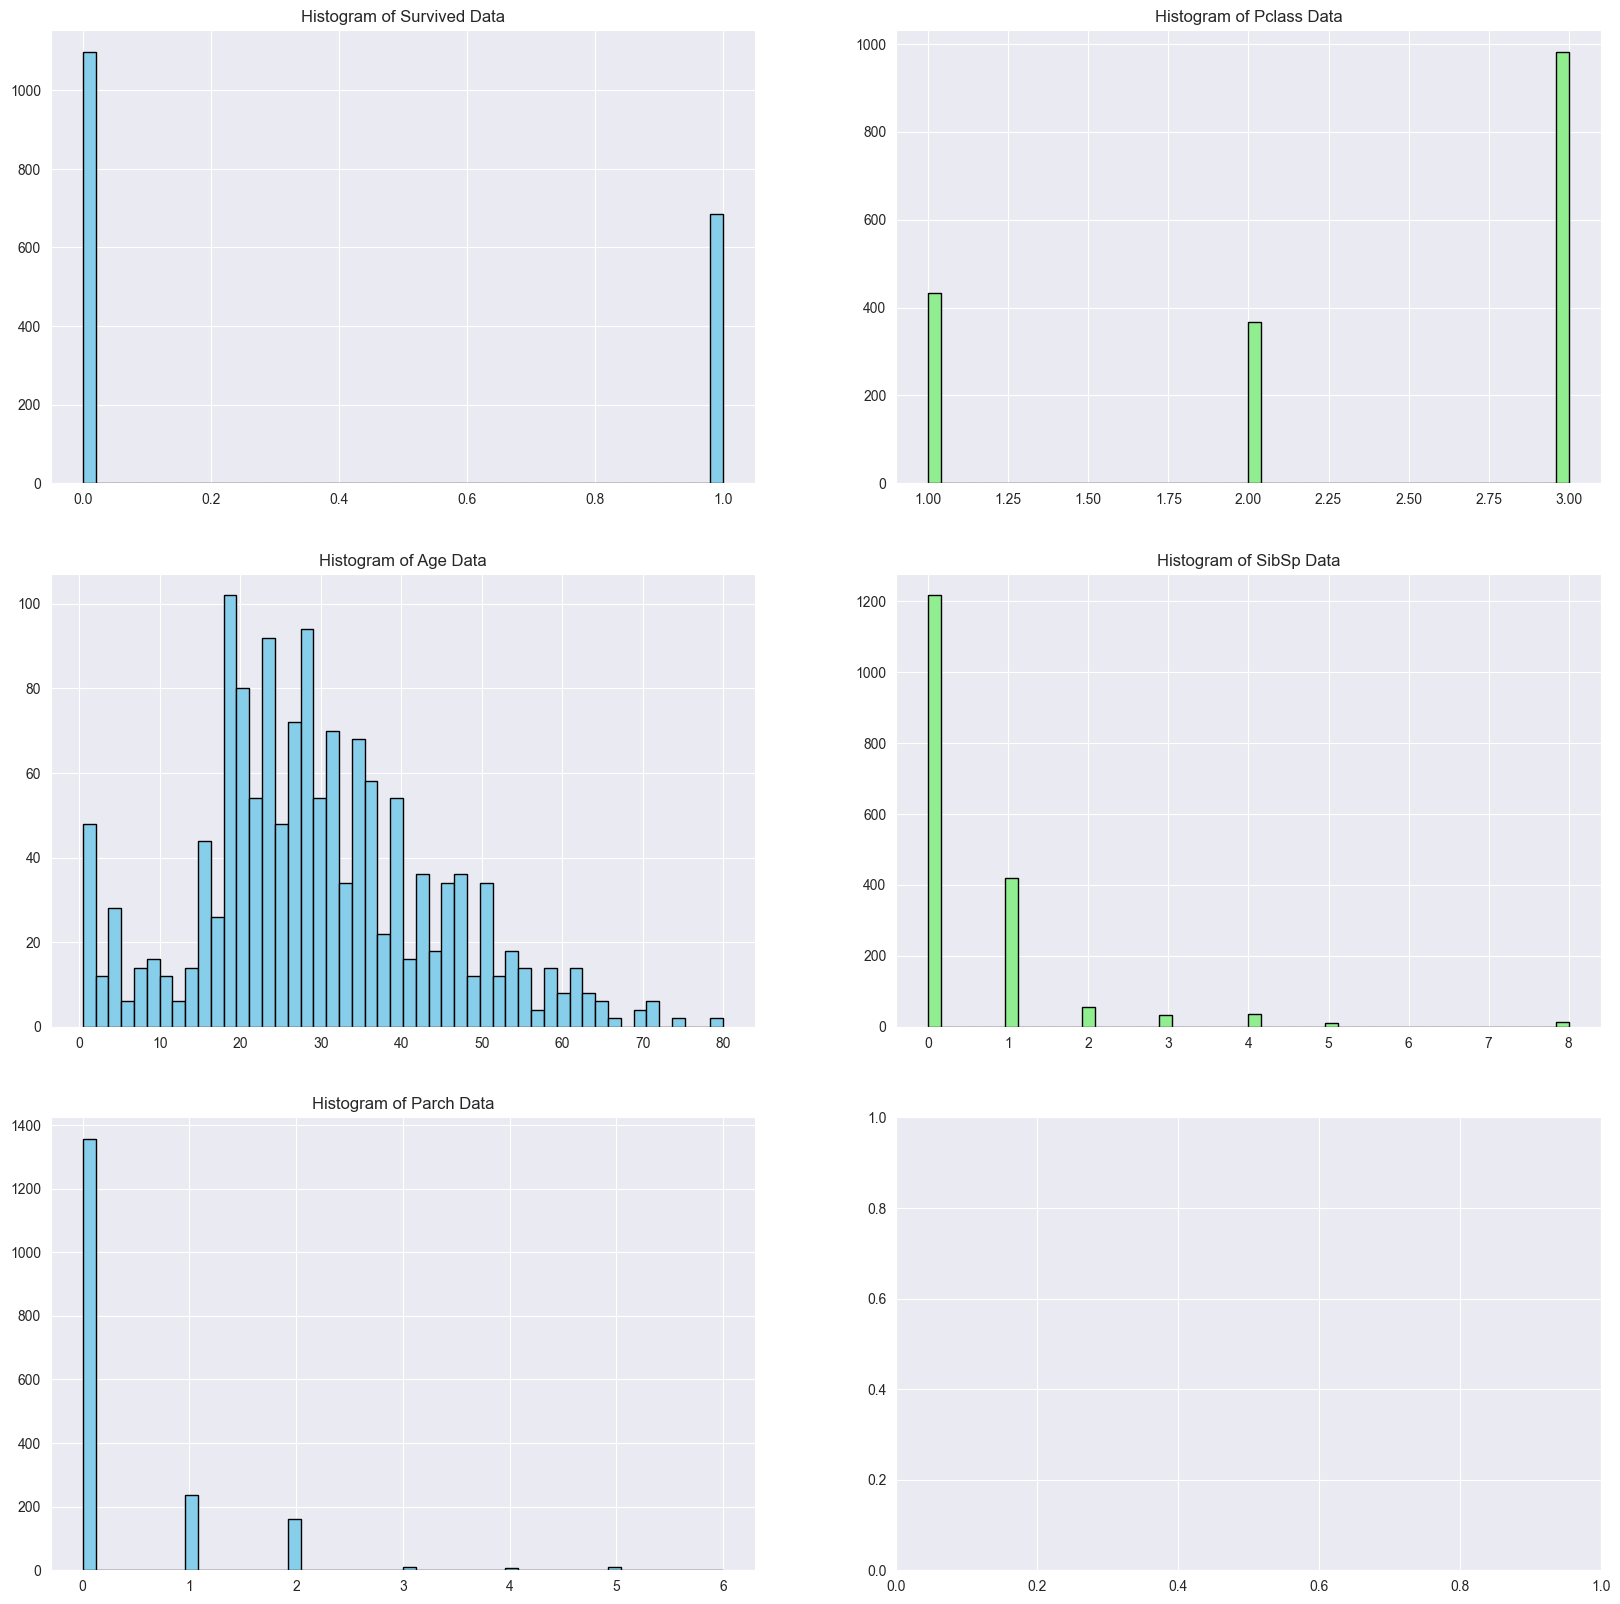

In [11]:
fig, axs = plt.subplots(3, 2,figsize=(20, 20))
axs[0, 0].hist(split_cabin_long['Survived'], bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of Survived Data')

axs[0, 1].hist(split_cabin_long['Pclass'], bins=50, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Histogram of Pclass Data')

axs[1, 0].hist(split_cabin_long['Age'], bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Histogram of Age Data')

axs[1, 1].hist(split_cabin_long['SibSp'], bins=50, color='lightgreen', edgecolor='black')
axs[1, 1].set_title('Histogram of SibSp Data')

axs[2, 0].hist(split_cabin_long['Parch'], bins=50, color='skyblue', edgecolor='black')
axs[2, 0].set_title('Histogram of Parch Data')



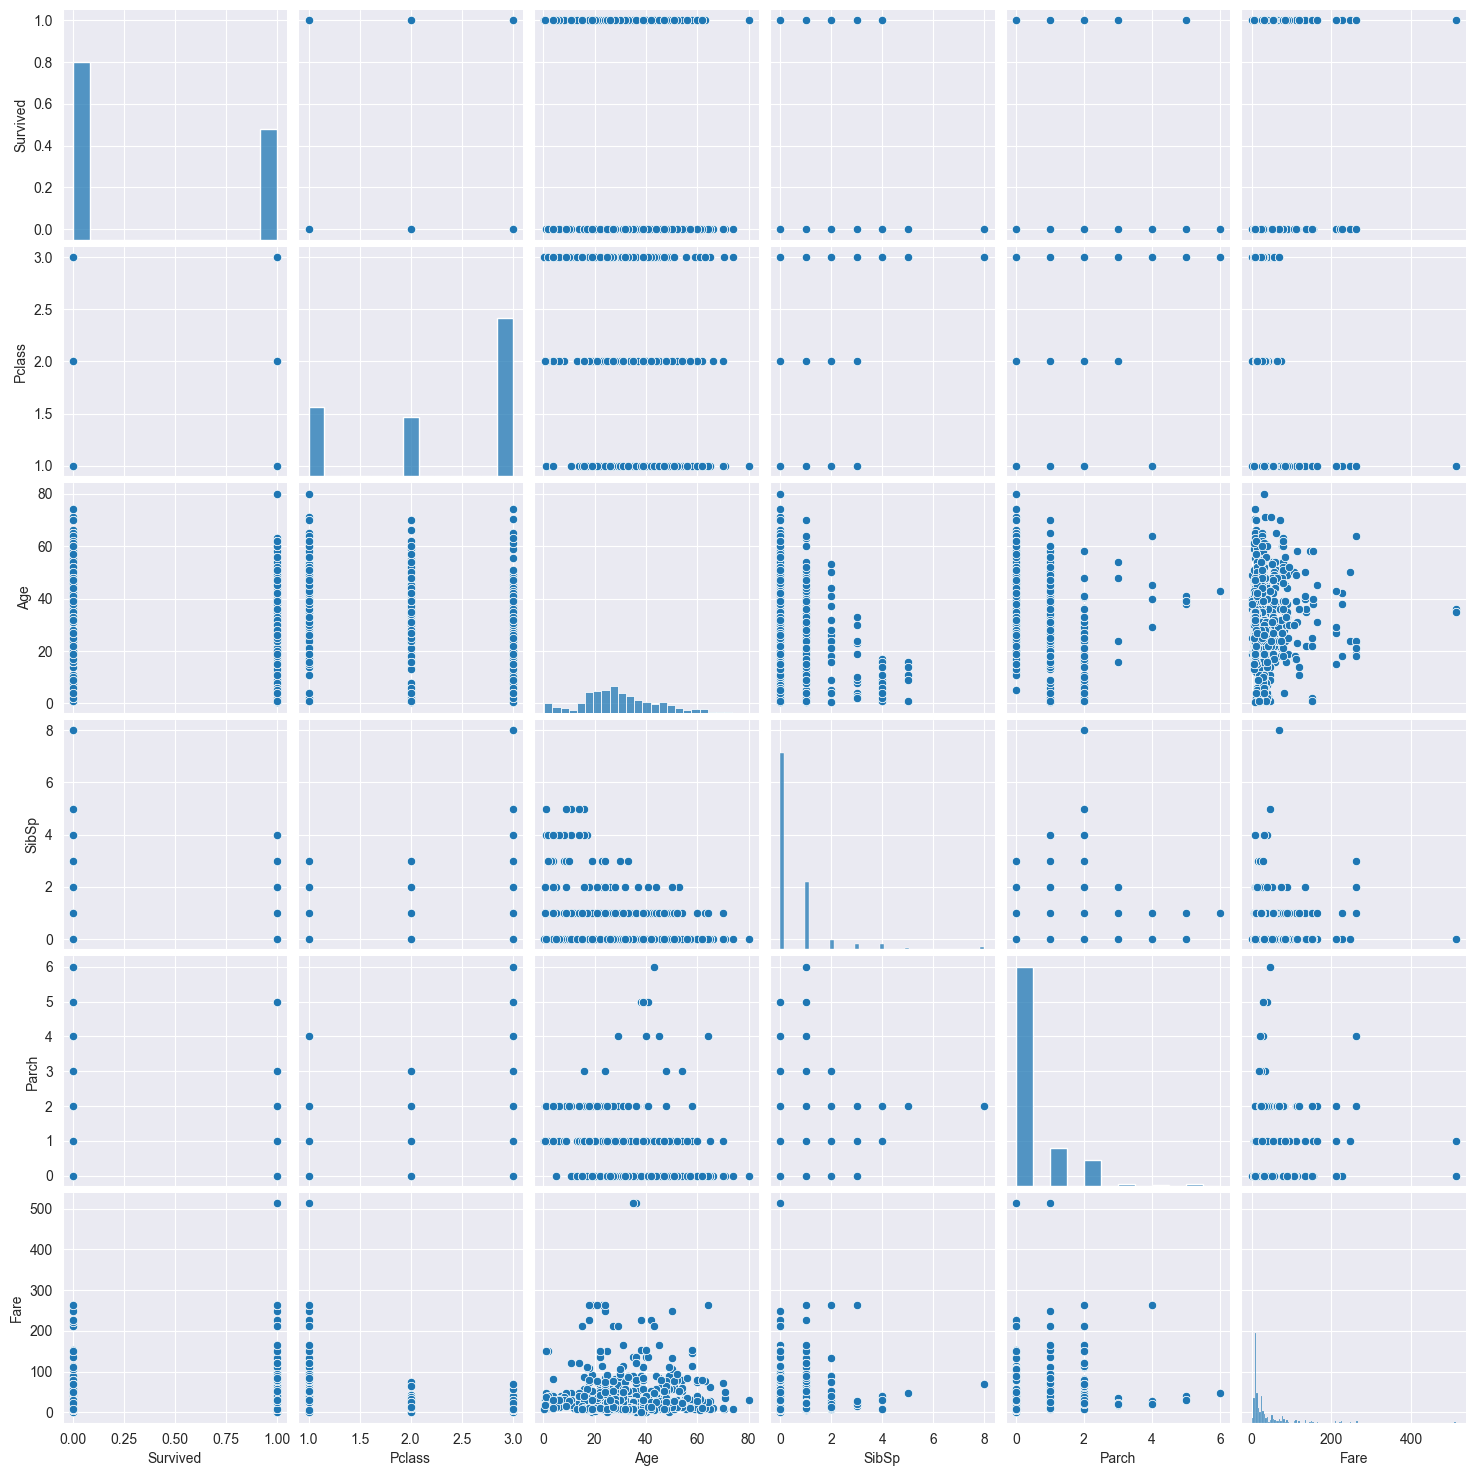

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(split_cabin_long)

In [43]:
data = split_cabin_long
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cabin_split
0,0,3,male,22.0,1,0,7.2500,NaN,S,C85
1,0,3,male,22.0,1,0,7.2500,NaN,S,C123
2,1,1,female,38.0,1,0,71.2833,C85,C,E46
3,1,1,female,38.0,1,0,71.2833,C85,C,G6
4,1,3,female,26.0,0,0,7.9250,NaN,S,C103
...,...,...,...,...,...,...,...,...,...,...
1777,0,3,female,NaN,1,2,23.4500,NaN,S,NaN
1778,1,1,male,26.0,0,0,30.0000,C148,C,NaN
1779,1,1,male,26.0,0,0,30.0000,C148,C,NaN
1780,0,3,male,32.0,0,0,7.7500,NaN,Q,NaN


### Data Preprocessing:

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1 = data[['cabin_split']]
numeric_data = encoder.fit_transform(data1)
data2 = data[['Sex']]
numeric_data2 = encoder.fit_transform(data2)
data3 = data[['Embarked']]
numeric_data3 = encoder.fit_transform(data3)


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
data['cabin']=numeric_data
data['Sex'] = numeric_data2
data['Embarked'] = numeric_data3


In [53]:
train_data = data.copy() 
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cabin_split,cabin,Gender
0,0,3,1,22.0,1,0,7.2500,NaN,2,C85,93,1
1,0,3,1,22.0,1,0,7.2500,NaN,2,C123,63,1
2,1,1,0,38.0,1,0,71.2833,C85,0,E46,142,0
3,1,1,0,38.0,1,0,71.2833,C85,0,G6,157,0
4,1,3,0,26.0,0,0,7.9250,NaN,2,C103,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1777,0,3,0,NaN,1,2,23.4500,NaN,2,NaN,161,0
1778,1,1,1,26.0,0,0,30.0000,C148,0,NaN,161,1
1779,1,1,1,26.0,0,0,30.0000,C148,0,NaN,161,1
1780,0,3,1,32.0,0,0,7.7500,NaN,1,NaN,161,1


In [54]:
train_data.drop('cabin_split', axis=1, inplace=True)

In [55]:
train_data.isnull().sum()
train_data = train_data.dropna()
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cabin,Gender
2,1,1,0,38.0,1,0,71.2833,C85,0,142,0
3,1,1,0,38.0,1,0,71.2833,C85,0,157,0
6,1,1,0,35.0,1,0,53.1000,C123,2,13,0
7,1,1,0,35.0,1,0,53.1000,C123,2,71,0
12,0,1,1,54.0,0,0,51.8625,E46,2,23,1
...,...,...,...,...,...,...,...,...,...,...,...
1759,1,1,0,56.0,0,1,83.1583,C50,0,161,0
1774,1,1,0,19.0,0,0,30.0000,B42,2,161,0
1775,1,1,0,19.0,0,0,30.0000,B42,2,161,0
1778,1,1,1,26.0,0,0,30.0000,C148,0,161,1


####  Model Building:

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = train_data.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [72]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [74]:
# Fitting logistic regression to the training set
Classifier = LogisticRegression(random_state=0)
Classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

#### Make Predictions and Evaluate the Model


In [75]:
y_pred = Classifier.predict(X_test)


In [76]:
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [77]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.78
Confusion Matrix:
[[17  4]
 [12 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.81      0.68        21
           1       0.91      0.77      0.84        53

    accuracy                           0.78        74
   macro avg       0.75      0.79      0.76        74
weighted avg       0.82      0.78      0.79        74



##### ROC (Receiver Operating Curve)

In [78]:
from sklearn.metrics import roc_curve, auc

In [79]:
y_prob = Classifier.predict_proba(X_test)[:, 1]

In [80]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

AUC: 0.88


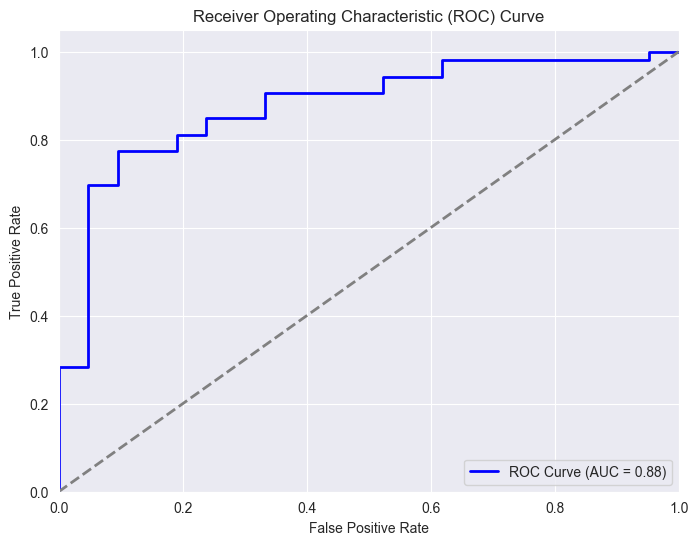

In [81]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [82]:
test_data = pd.read_csv('D:\\Data-science\\Titanic_test.csv')  # Replace with actual path or DataFrame

# Preprocess test data
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,36.0,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,3,"Ware, Mr. Frederick",0,36.0,0,0,359309,8.0500,NaN,2


In [83]:
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,0,36.0,0,0,8.0500,2
414,1,1,39.0,0,0,108.9000,0
415,3,0,38.5,0,0,7.2500,2
416,3,0,36.0,0,0,8.0500,2


In [84]:
predictions = Classifier.predict(X_test)
predictions

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [86]:
test_data['PredictedSurvived'] = predictions

# View first few predictions
test_data[['PassengerId', 'Name', 'PredictedSurvived']]


,PassengerId,Name,PredictedSurvived
0,892,"Kelly, Mr. James",1
1,893,"Wilkes, Mrs. James (Ellen Needs)",0
2,894,"Myles, Mr. Thomas Francis",1
3,895,"Wirz, Mr. Albert",1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
...,...,...,...
413,1305,"Spector, Mr. Woolf",1
414,1306,"Oliva y Ocana, Dona. Fermina",1
415,1307,"Saether, Mr. Simon Sivertsen",1
416,1308,"Ware, Mr. Frederick",1


In [87]:
import streamlit as st


In [88]:
# Streamlit App
st.title("Titanic Survived Classification")

st.write("""
This app uses logistic regression to classify whether Titanic Passenger Survived ratio.
""")

2025-05-17 13:16:23.741 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:16:24.303 
  command:

    streamlit run C:\Users\naveen.julla\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-17 13:16:24.318 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:16:24.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:16:24.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:16:24.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:16:24.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [89]:
pclass_input = st.sidebar.selectbox('Pclass', train_data.Pclass.unique())
age_input = st.sidebar.number_input('Please enter age', min_value=0,max_value=150)
fare_input = st.sidebar.number_input('Please enter Fare', min_value=0,max_value=10000)
sib_input =st.sidebar.selectbox('SibSp', train_data.SibSp.unique())
prach_input =st.sidebar.selectbox('prach', train_data.Parch.unique())
Gender_input =st.sidebar.selectbox('Gender', data.Sex.unique())
Embarked_numeric_input =st.sidebar.selectbox('Embraked', data.Embarked.unique())
gender = 0
if Gender_input == 'Male': gender = 1

embarked = 3
if Embarked_numeric_input == 'C': 
  embarked = 0 
elif Embarked_numeric_input == 'Q': 
  embarked = 1
elif Embarked_numeric_input == 'S': 
  embarked = 2



2025-05-17 13:22:23.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:22:23.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:22:23.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:22:23.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:22:23.373 Session state does not function when running a script without `streamlit run`
2025-05-17 13:22:23.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:22:23.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:22:23.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:22

In [90]:
user_input = np.array([[pclass_input, Gender_input,age_input, sib_input, prach_input, fare_input, embarked]])
print(user_input)


[[1 1 0 1 0 0 3]]


In [91]:
user_input_scaled = sc.transform(user_input)
print(user_input_scaled)

[[-0.34883264  0.96676808 -2.34181607  0.93680945 -0.58130733 -1.04865723
   1.77378697]]


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [92]:
prediction = Classifier.predict(user_input_scaled)
print(prediction)

[1]


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [94]:
if prediction[0] == 1:
    st.write("### The Customer is **Survived**!")
else:
    st.write("### The Customer is **Not Survived**!")

2025-05-17 13:53:05.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:53:05.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:53:05.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 13:53:05.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
